<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/unsupervised/dimensionality_reduction/02_pca_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

suppress=True = nie używaj notacji naukowej (np. 1.23e-06) do wyświetlania małych liczb, tylko wypisuj je w zwykłej postaci dziesiętnej.

###Załadowanie danych - breast cancer

In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
data[:3]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [3]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
data.shape

(569, 30)

###Standaryzacja

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

###PCA - 2 komponenty

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [7]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:,0], 'pca_2':data_pca[:,1], 'class':target})
pca_2.replace(0, 'Benign', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [8]:
results = pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index+1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()

In [10]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

malignant → złośliwy (w kontekście medycznym: nowotwór złośliwy, czyli taki, który może rosnąć, naciekać tkanki i dawać przerzuty).

benign → łagodny (nowotwór łagodny – rośnie wolno, nie nacieka i zazwyczaj nie daje przerzutów).

### PCA - 3 komponenty

In [11]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:10]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898],
       [ 2.3802,  3.9499, -2.9349],
       [ 2.2389, -2.69  , -1.6399],
       [ 2.1433,  2.3402, -0.8719],
       [ 3.1749,  3.3918, -3.12  ],
       [ 6.3517,  7.7272, -4.3419]])

In [12]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:,0],'pca_2':data_pca[:,1], 'pca_3': data_pca[:,2], 'class': target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [13]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [14]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout = go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [15]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class',
              opacity=0.7, size_max=10, width=950, template='plotly_dark')

###Zbiór danych MNIST

In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Obcięcie danych do pierwszych 5 000 zdjęć

In [19]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [21]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Wizualizacja danych

In [23]:
X_train.max()

np.uint8(255)

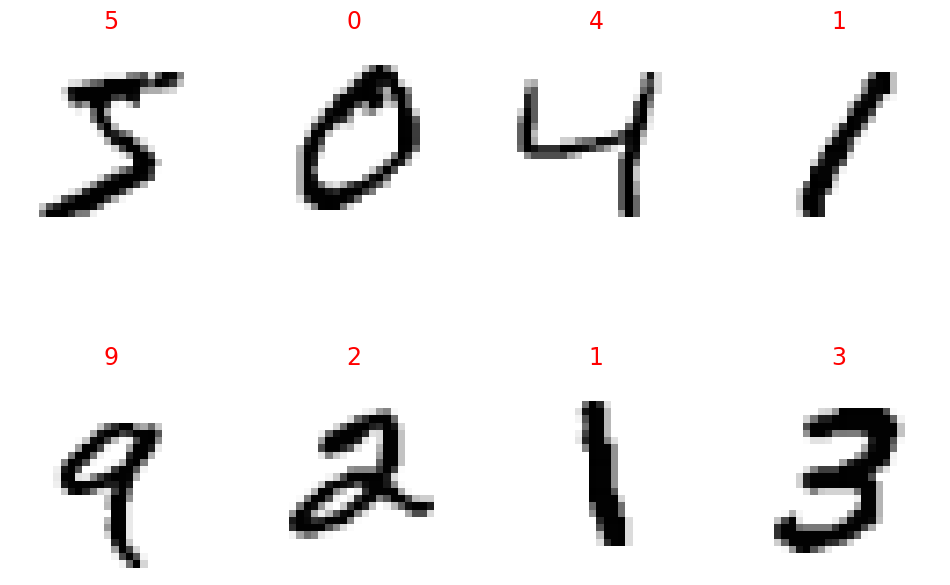

In [29]:
plt.figure(figsize=(12,8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='red', fontsize=17)
  plt.axis('off')
plt.show()

Standaryzacja

In [28]:
X_train = X_train/255.
X_test = X_test/255.
X_train.shape

(5000, 28, 28)

Wypłaszczenie obrazów

In [32]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(5000, 784)

PCA - 3 komponenty

In [33]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4463,  0.1267],
       [ 4.0678,  1.5157, -2.163 ],
       [-0.1116, -1.7779,  0.6183],
       [-3.4395,  2.3376, -0.6105],
       [-1.403 , -2.6951,  0.1722]])

Wyjaśniona wariancja

In [35]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [37]:
fig = go.Figure(data=[
    go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
    go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')
], layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [38]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1','pca_2','pca_3','class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455461,1.446327,0.126699,5.0
1,4.067770,1.515656,-2.162965,0.0
2,-0.111574,-1.777916,0.618260,4.0
3,-3.439496,2.337639,-0.610536,1.0
4,-1.403018,-2.695114,0.172167,9.0


Wizualizacja 3D głównych komponentów

In [39]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              symbol='class', opacity=0.7, size_max=10, width=950, height=700,
              template='plotly_dark', title='PCA - MNIST dataset')

Wyjaśniona wariancja

In [40]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.4555,  1.4464,  0.1266,  2.0464,  0.9062, -0.8658,  0.7143,  0.3843, -1.2169,  0.5736, -0.2233, -1.8176,  1.0697, -2.8846, -0.0435,
         0.4055, -1.3517,  0.4881,  0.7439, -1.2559, -0.491 , -0.8971, -0.7157,  0.7823,  0.2474,  0.3642,  1.3117,  0.4369, -0.4515,  0.1556,
        -0.5905, -0.0318, -0.0879,  0.1545, -0.1757, -0.4434, -0.7237, -0.3561,  0.4432, -1.7112,  0.2673, -0.8439,  0.3894, -0.1528, -0.044 ,
         0.5125, -0.6194,  0.1968, -0.2109, -0.3994, -0.3107, -0.0907,  0.1361,  0.5926, -0.0147,  0.7161,  0.497 , -0.6163, -0.2884,  0.1627,
        -0.5686, -0.1277, -0.6545, -0.3407,  0.7817,  0.2586, -0.0567,  0.2488,  0.3312,  0.1065,  0.0352,  0.6306,  0.0124, -0.2624,  0.3622,
        -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702,  0.2134, -0.0943,  0.0714,  0.4736,  0.3605, -0.2183, -0.1694, -0.233 ,  0.1073,
        -0.2171, -0.0678, -0.043 , -0.2504,  0.0245, -0.1631, -0.0138, -0.2231,  0.3506,  0.0314,  0.5392, -0.0519,  0.2189,  0.1758,  0.036 ,

In [41]:
pca.n_components_

np.int64(148)

148 zmiennych trzyma 95% rozrzutu naszych danych (na początku zmiennych ponad 700)

In [45]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1

In [46]:
fig = go.Figure(data = [go.Bar(x = results['component'], y = results['explained_variance_ratio'], name='explained_variance_ratio'),
                go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template = 'plotly_dark'))
fig.show()

###Zbiór danych CIFAR

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train_shape: {X_train.shape}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_train_shape: {y_train.shape}')
print(f'y_test_shape: {y_test.shape}')

X_train_shape: (50000, 32, 32, 3)
X_test_shape: (10000, 32, 32, 3)
y_train_shape: (50000, 1)
y_test_shape: (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
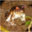

In [3]:
X_train[0]

Obcięcie do pierwszych 5 000 obrazów

In [4]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train.shape

(5000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Wizualizacja

W datasetach takich jak CIFAR-10 w Kerasie etykiety y_train są zapisane jako tablica 2D o wymiarach (50000, 1).

y_train[1] → zwraca drugi wiersz → np. [3] (czyli tablica 1-elementowa).

y_train[1][0] → bierze pierwszy element z [3] → daje 3.

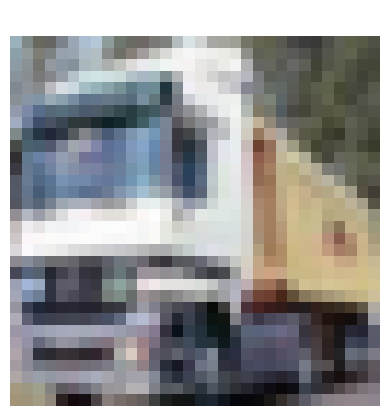

In [8]:
targets ={0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

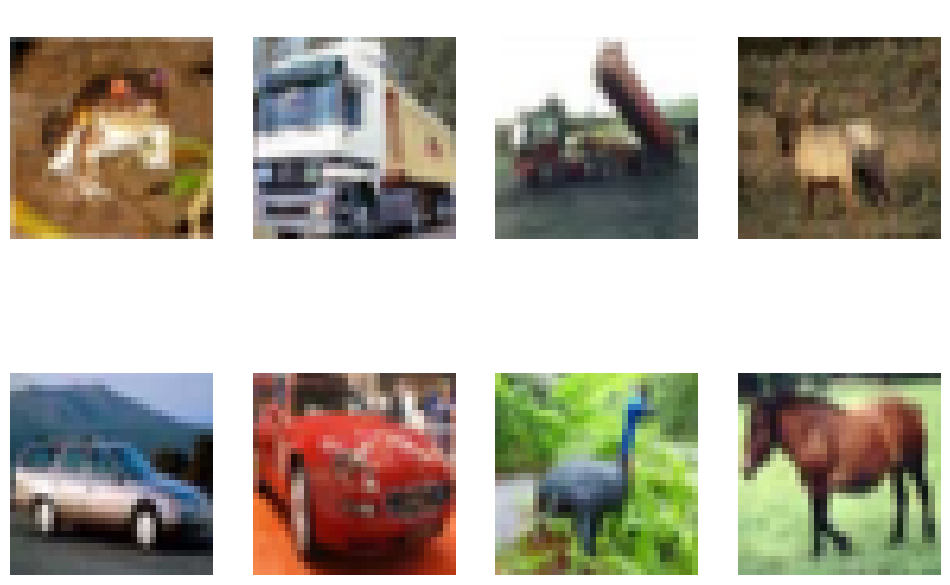

In [9]:
plt.figure(figsize=(12,8))
for i in range(8):
  plt.subplot(240+i+1)
  plt.imshow(X_train[i])
  plt.title(targets[y_train[i][0]], color='white',fontsize=17)
  plt.axis('off')
plt.show()

Standaryzacja

In [10]:
X_train = X_train/255.
X_test = X_test/255.
X_train.shape

(5000, 32, 32, 3)

Wypłaszczenie obrazów

In [11]:
X_train = X_train.reshape(-1, 32*32*3)
X_train.shape

(5000, 3072)

In [12]:
X_train[:5]

array([[0.2314, 0.2431, 0.2471, ..., 0.4824, 0.3608, 0.2824],
       [0.6039, 0.6941, 0.7333, ..., 0.5608, 0.5216, 0.5647],
       [1.    , 1.    , 1.    , ..., 0.3137, 0.3373, 0.3294],
       [0.1098, 0.098 , 0.0392, ..., 0.2824, 0.2549, 0.1804],
       [0.6667, 0.7059, 0.7765, ..., 0.2863, 0.302 , 0.3137]])

PCA - 3 komponenty

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772],
       [  0.8709,  -0.8715,   6.2163],
       [  8.111 , -11.1948,  -2.6912],
       [-10.3522,  -0.2394,   1.2522],
       [ -2.4619,  -4.8347,   1.2479]])

Wyjaśniona wariancja

In [15]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [16]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y =results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [17]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1','pca_2','pca_3','class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-6.502318,2.550480,1.577223,6.0,frog
1,0.870890,-0.871500,6.216323,9.0,truck
2,8.111013,-11.194790,-2.691174,9.0,truck
3,-10.352160,-0.239424,1.252192,4.0,deer
4,-2.461939,-4.834697,1.247857,1.0,automobile


Wizualizacja 3D głównych komponentów

In [18]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name',
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR datasets', template='plotly_dark')

PCA - 95% wariancji

In [19]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772, ...,  -0.2103,  -0.0938,   0.029 ],
       [  0.8709,  -0.8715,   6.2163, ...,  -0.3181,  -0.2744,   0.6623],
       [  8.111 , -11.1948,  -2.6912, ...,  -0.2744,  -0.2524,  -0.0605],
       [-10.3522,  -0.2394,   1.2522, ...,   0.0044,  -0.0575,  -0.0231],
       [ -2.4619,  -4.8347,   1.2479, ...,   0.0938,  -0.23  ,   0.0335]])

In [20]:
pca.n_components_

np.int64(203)

In [21]:
pca.explained_variance_ratio_

array([0.2919, 0.1125, 0.0664, 0.0371, 0.0354, 0.0288, 0.0265, 0.0219, 0.0211, 0.0145, 0.0135, 0.0105, 0.0105, 0.0101, 0.0091, 0.0085, 0.0075,
       0.0071, 0.0067, 0.0066, 0.0062, 0.0058, 0.0051, 0.0049, 0.0048, 0.0047, 0.0046, 0.0045, 0.0041, 0.004 , 0.0037, 0.0034, 0.0032, 0.0032,
       0.0031, 0.003 , 0.0027, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0021, 0.0021, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018,
       0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013,
       0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,

Wariancja wyjaśniona

In [22]:
X_train[0]

array([0.2314, 0.2431, 0.2471, ..., 0.4824, 0.3608, 0.2824])

In [23]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5


In [24]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()